In [2]:
# =========================
# IMPORT LIBRARIES
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:

# =========================
# LOAD DATA
# =========================
df = pd.read_csv("./ML471_S2_Datafile_Practice.csv")

# Date only for ordering
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Use Close_diff only
series = df['Close_diff'].dropna().values



In [4]:


# =========================
# TRAIN–TEST SPLIT (80–20)
# =========================
train_size = int(len(series) * 0.8)
train = series[:train_size]
test = series[train_size:]



In [5]:

# =========================
# SELECT BEST MA(q) USING AIC
# =========================
best_aic = np.inf
best_q = None

for q in range(1, 6):
    try:
        model = ARIMA(train, order=(0, 0, q))
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_q = q
    except:
        continue

print(f"Selected MA Model: MA({best_q}) with AIC = {best_aic}")



Selected MA Model: MA(1) with AIC = 479.59080475577304


In [6]:


# =========================
# FIT FINAL MODEL
# =========================
final_model = ARIMA(train, order=(0, 0, best_q))
final_result = final_model.fit()

# =========================
# FORECAST
# =========================
forecast = final_result.forecast(steps=len(test))

# =========================
# PERFORMANCE METRICS
# =========================
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("\nForecast Accuracy Metrics")
print(f"MAE  : {mae}")
print(f"MAPE : {mape}%")
print(f"RMSE : {rmse}")




Forecast Accuracy Metrics
MAE  : 2.8338005457023305
MAPE : 101.61131455614574%
RMSE : 3.5176336958644754


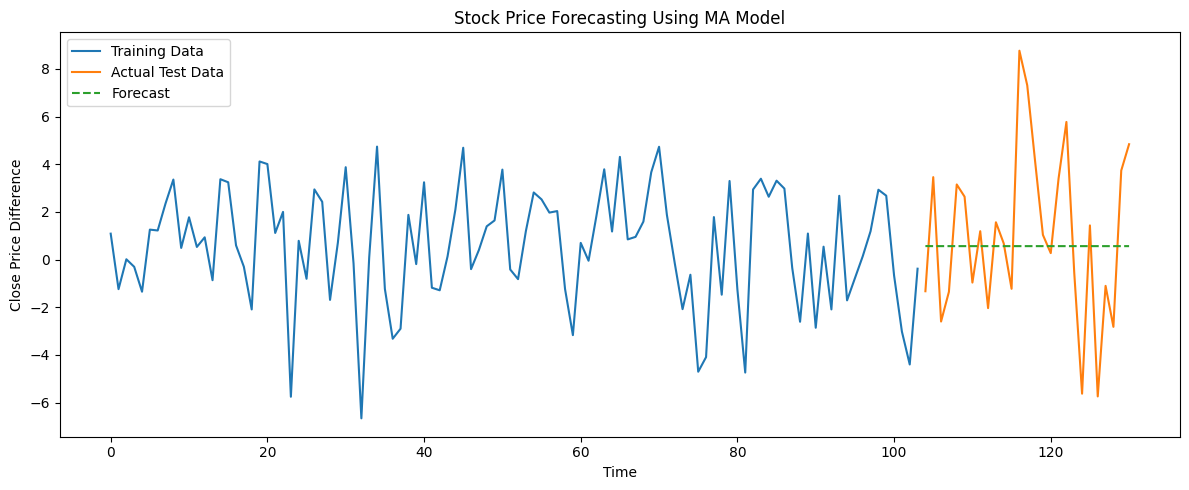

In [7]:


# =========================
# VISUALIZATION (0–N X-AXIS)
# =========================
x_train = np.arange(0, len(train))
x_test = np.arange(len(train), len(series))
x_forecast = x_test

plt.figure(figsize=(12, 5))

plt.plot(x_train, train, label="Training Data")
plt.plot(x_test, test, label="Actual Test Data")
plt.plot(x_forecast, forecast, label="Forecast", linestyle="--")

plt.title("Stock Price Forecasting Using MA Model")
plt.xlabel("Time")
plt.ylabel("Close Price Difference")
plt.legend()
plt.tight_layout()
plt.show()